# Training data estimation

## Learning curves

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
data, target = fetch_openml(data_id=60, return_X_y = True)

In [49]:
def train_plot(model):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, stratify=target, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=5
                                                        , train_sizes=np.linspace(0.1, 1.0, 10)
                                                        , n_jobs=4)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    #
    # Plot the learning curve
    #
    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
    plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

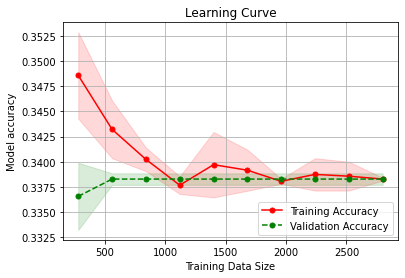

In [50]:
model = DummyClassifier(strategy='most_frequent')
train_plot(model)

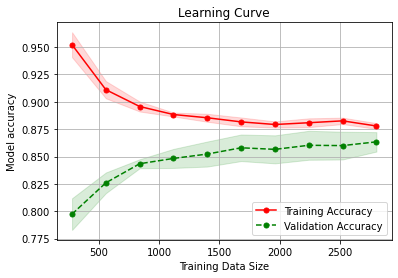

In [52]:
model = LogisticRegression(random_state=42, max_iter=1000)
train_plot(model)

## Data Augmentation

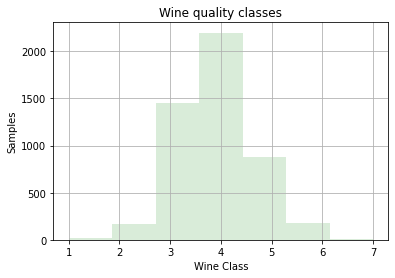

In [89]:
data, target = fetch_openml(data_id=40498, return_X_y = True)
plt.hist(sorted(target), bins=7, align='mid',alpha=0.15, color='green')
plt.title('Wine quality classes')
plt.xlabel('Wine Class')
plt.ylabel('Samples')
plt.grid()
plt.show()

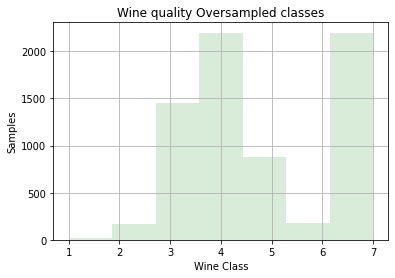

In [91]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(data, target)
plt.hist(sorted(y_resampled), bins=7, align='mid',alpha=0.15, color='green')
plt.title('Wine quality Oversampled classes')
plt.xlabel('Wine Class')
plt.ylabel('Samples')
plt.grid()
plt.show()

## Model space

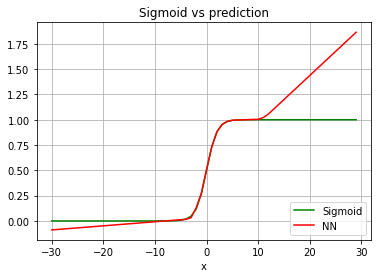

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

data = np.linspace(-10, 10, 100) 
target = 1/(1 + np.exp(-x)) 

model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(data,target, epochs=1000, verbose=0)

data = np.arange(-30.0, 30.0, 1.0)
pred = model.predict(data)
target = sigmoid(data)

plt.plot(data, target, color='green', label='Sigmoid') 
plt.plot(data, pred, color='red', label='NN') 
plt.title('Sigmoid vs prediction')
plt.xlabel("x") 
plt.grid()
plt.legend(loc='lower right')
plt.show() 